Train model and generate trained models performace summary.  
Models are ordered by validation performace from good to bad

In [1]:
import joblib
import matplotlib.pyplot as plt
from vol_predict import VolPredictor
from sklearn.model_selection import train_test_split

ticker = 'GLD'
DAYS_WINDOW_SIZE = 21
RETRIEVE_PERIOD = '5y'
SEQUENCE_LENGTH_WINDOWS = 6
model_path = f'./vol_lstm.keras'
scaler_path = './scaler.pkl'

predictor = VolPredictor()

market_data = predictor.get_market_data(ticker, retrieve_period=RETRIEVE_PERIOD)
vol_data = predictor.calculate_return_and_vol(market_data, DAYS_WINDOW_SIZE)
scaled_vol_data = predictor.normalise_data(vol_data, DAYS_WINDOW_SIZE)
features = [col for col in scaled_vol_data.columns if col.startswith(predictor._FEATURE_PREFIX)]
feature_data_array = scaled_vol_data[features].values
X_array, y_array = predictor.restruncture_data(feature_data_array, vol_window_days=DAYS_WINDOW_SIZE, sequence_months=SEQUENCE_LENGTH_WINDOWS, has_target=True)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=0) 
tuner = predictor.train_model(X_train_val, y_train_val, model_path=model_path)

joblib.dump(predictor.scaler, scaler_path)

trial_performance_df = predictor.generate_model_performance(tuner, X_test=X_test, y_test=y_test, X_all=X_array, y_all=y_array)
trial_performance_df

Trial 20 Complete [00h 01m 31s]
multi_objective: 0.015687232837080956

Best multi_objective So Far: 0.015687232837080956
Total elapsed time: 00h 12m 07s
35/35 [==============================] - 0s 11ms/step - loss: 0.0261 - smape: 40.7817


,trial_id,score,test_loss,test_metric,all_loss,all_metric,number of hidden layers,units_1,dropout_1,lr,units_2,dropout_2,loss_last,smape_last,val_loss_last,val_smape_last,multi_objective_last,units_3,dropout_3
0,0,0.019889,0.0160,35.1982,0.0162,34.6554,2,32,0.2,0.008926,32,0.1,0.026157,40.699421,0.019889,39.553070,0.019889,NaN,NaN
1,1,0.019840,0.0228,40.3495,0.0222,39.8069,2,96,0.1,0.001951,96,0.2,0.025965,40.089325,0.019840,39.290371,0.019840,NaN,NaN
2,2,0.019887,0.0225,39.6044,0.0220,38.9928,2,128,0.1,0.001181,128,0.2,0.025593,40.166229,0.019887,39.328728,0.019887,NaN,NaN
3,3,0.021110,0.0223,40.0886,0.0218,39.2474,3,96,0.1,0.000134,96,0.2,0.028185,41.382401,0.021110,39.516846,0.021110,32.0,0.1
4,4,0.020870,0.0217,39.7419,0.0214,38.9956,2,64,0.2,0.000275,96,0.1,0.027295,40.738651,0.020870,39.371559,0.020870,32.0,0.2
5,5,0.019388,0.0225,40.1940,0.0222,39.5275,2,128,0.1,0.006094,128,0.2,0.024691,40.647697,0.019388,39.059044,0.019388,32.0,0.1
6,6,0.019239,0.0237,40.6490,0.0233,40.0155,1,128,0.1,0.010000,96,0.2,0.023843,39.909657,0.019239,38.964558,0.019239,32.0,0.1
7,7,0.019687,0.0234,40.0879,0.0232,39.7490,1,128,0.1,0.010000,128,0.2,0.026536,40.815723,0.019687,38.963318,0.019687,128.0,0.1
8,8,0.019156,0.0229,40.6445,0.0228,40.0006,1,128,0.2,0.010000,128,0.2,0.023222,39.355862,0.019156,38.775845,0.019156,32.0,0.1
9,9,0.019983,0.0225,40.2261,0.0223,39.5469,1,32,0.1,0.010000,128,0.2,0.026925,40.957428,0.019983,39.253654,0.019983,32.0,0.1


Plot models performance

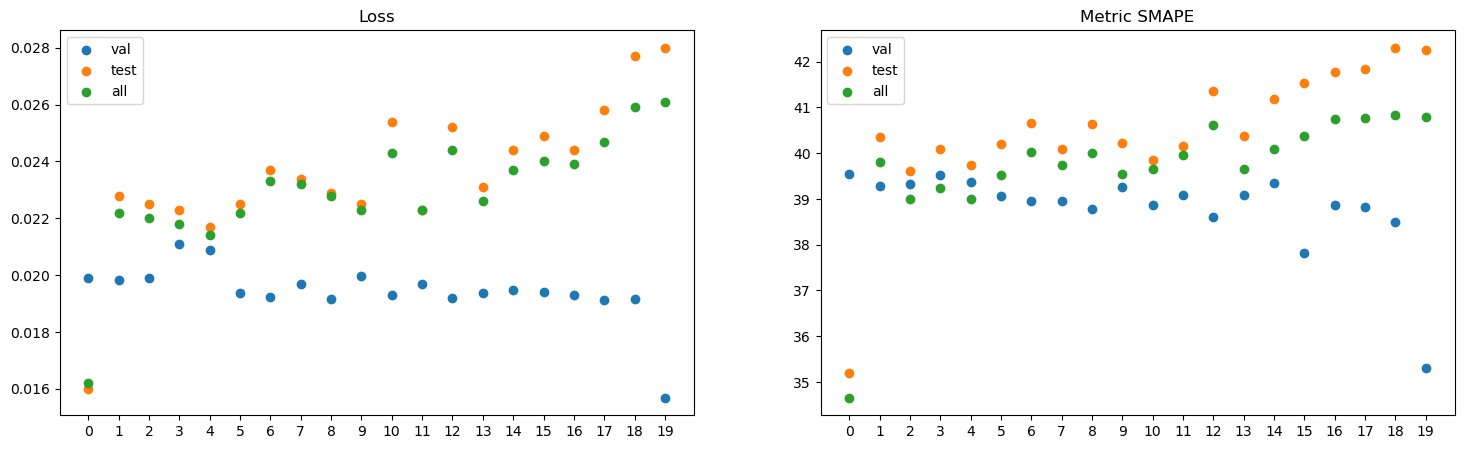

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

axs[0].scatter(y=trial_performance_df['score'], x=trial_performance_df.index, label='val')
axs[0].scatter(y=trial_performance_df['test_loss'], x=trial_performance_df.index, label='test')
axs[0].scatter(y=trial_performance_df['all_loss'], x=trial_performance_df.index, label='all')
axs[0].set_title('Loss')
axs[0].set_xticks(trial_performance_df.index)
axs[0].legend()

axs[1].scatter(y=trial_performance_df['val_smape_last'], x=trial_performance_df.index, label='val')
axs[1].scatter(y=trial_performance_df['test_metric'], x=trial_performance_df.index, label='test')
axs[1].scatter(y=trial_performance_df['all_metric'], x=trial_performance_df.index, label='all')
axs[1].set_title('Metric SMAPE')
axs[1].set_xticks(trial_performance_df.index)
axs[1].legend()

plt.show()

Predict on lastest data

In [3]:
from vol_predict import VolPredictor

DAYS_WINDOW_SIZE = 21
SEQUENCE_LENGTH_WINDOWS = 6
ticker = 'GLD'
saved_scaler = joblib.load(scaler_path)

vol_predictor = VolPredictor()
num_samples = DAYS_WINDOW_SIZE * (SEQUENCE_LENGTH_WINDOWS-1) + 1
pred_market_data = vol_predictor.get_market_data(ticker=ticker, retrieve_period=f'{SEQUENCE_LENGTH_WINDOWS + 2}mo')
pred_return_vol = vol_predictor.calculate_return_and_vol(data_df=pred_market_data, window_size=DAYS_WINDOW_SIZE)
pred_scaled_vol_data = vol_predictor.normalise_data(pred_return_vol, DAYS_WINDOW_SIZE, scaler=saved_scaler)
features = [col for col in pred_scaled_vol_data.columns if col.startswith(vol_predictor._FEATURE_PREFIX)]
pred_feature_data_array = pred_scaled_vol_data[features].values
X_pred = vol_predictor.restruncture_data(pred_feature_data_array, vol_window_days=DAYS_WINDOW_SIZE, sequence_months=SEQUENCE_LENGTH_WINDOWS, has_target=False)[-1]

# model = tuner.get_best_models(1)[0]
model = vol_predictor.load_model(model_path)
rv_pred = model.predict(X_pred.reshape(1,6,1))
rv_inver_pred = vol_predictor.scaler.inverse_transform(rv_pred)

print(X_pred)
print(rv_pred)
print(rv_inver_pred)

d:\note_repo\QF\vol_predict.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[f'{self._FEATURE_PREFIX}_{col_name}'] = self.scaler.transform(data_df[col_name].values.reshape(-1, 1))


1/1 [==============================] - 2s 2s/step
[[0.29461506]
 [0.21899229]
 [0.31973835]
 [0.197961  ]
 [0.94153251]
 [0.84878946]]
[[0.4310359]]
[[0.1748305]]
